In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape , data_test.shape

((1460, 81), (1459, 80))

In [5]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
Result = pd.concat((data,data_test))

In [7]:
x = round(100*(Result.isnull().sum())/len(Result.index),2)

In [8]:
def MissingValue(dataset):
    missing_data = dataset.isnull().sum().reset_index(drop=False)
    missing_data.columns = ['column', 'rows']
    missing_data["percentage"] = (missing_data.rows/len(dataset.index))*100
    missing_data = missing_data.loc[missing_data['percentage']>0].sort_values(by = 'percentage',ascending = False)
    return missing_data
    

In [9]:
#drop column which have greater 45 prcent null Value
dropped_col = []
remaining_col=[]
def dropR(Result1):
    missing_data = Result1.isnull().sum().reset_index(drop=False)
    missing_data.columns = ['column', 'rows']
    missing_data["percentage"] = (missing_data.rows/len(Result1.index))*100
    for i in range(missing_data.shape[0]):
        if missing_data['percentage'][i]>45:
            Result1.drop([missing_data['column'][i]],axis=1,inplace=True)
            dropped_col.append(missing_data['column'][i])
        else:
            remaining_col.append(missing_data['column'][i])
    return MissingValue(Result1)

In [10]:
def Unique_category(dataset):
    categorical_col=[]
    Num_col=[]
    for column in dataset.columns:
        if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
            categorical_col.append(column)
            print(f"{column} : {dataset[column].unique()}")
            print("====================================")
        else:
            Num_col.append(column)
            print(f"{column} : {dataset[column].unique()}")
            print("====================================")
            

In [11]:
Data_of_Cat = Result.select_dtypes(include=['object'])
Data_of_Cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
sns.heatmap(Data_of_Cat.isnull())

NameError: name 'sns' is not defined

In [13]:
MissingValue(Data_of_Cat)

,column,rows,percentage
38,PoolQC,2909,99.657417
40,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
39,Fence,2348,80.438506
32,FireplaceQu,1420,48.646797
35,GarageQual,159,5.447071
34,GarageFinish,159,5.447071
36,GarageCond,159,5.447071
33,GarageType,157,5.378554
22,BsmtCond,82,2.809181


In [14]:
dropR(Data_of_Cat)

,column,rows,percentage
34,GarageCond,159,5.447071
33,GarageQual,159,5.447071
32,GarageFinish,159,5.447071
31,GarageType,157,5.378554
21,BsmtCond,82,2.809181
22,BsmtExposure,82,2.809181
20,BsmtQual,81,2.774923
24,BsmtFinType2,80,2.740665
23,BsmtFinType1,79,2.706406
16,MasVnrType,24,0.822199


In [15]:
col=dropR(Data_of_Cat)['column'].values


In [16]:
def fill_max_cat(column , data):
    data[column].fillna(pd.DataFrame(Data_of_Cat[column].value_counts()).index[0],inplace=True)

In [17]:
for i in range(dropR(Data_of_Cat).shape[0]):
    fill_max_cat(col[i],Data_of_Cat)

In [18]:
Unique_category(Data_of_Cat)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'Meta

In [19]:
categorical_col=Data_of_Cat.columns

In [20]:
#label Encode which Are greater than 4
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(Data_of_Cat.shape[1]):
        Data_of_Cat[categorical_col[i]] = le.fit_transform(Data_of_Cat[categorical_col[i]] )

In [21]:
Data_of_Cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [21]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(Result['SalePrice'].values.reshape(-1,1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
Data_of_Num = Result.select_dtypes(include=['int64','float64'])

In [23]:
Data_of_Num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [24]:
Misssing_col = list(MissingValue(Data_of_Num)['column'])

In [25]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [26]:
for feature in Misssing_col:
    Data_of_Num[feature + '_imp'] = Data_of_Num[feature]
    Data_of_Num = random_imputation(Data_of_Num, feature)

In [27]:
Data_of_Num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_imp,LotFrontage_imp,GarageYrBlt_imp,MasVnrArea_imp,BsmtFullBath_imp,BsmtHalfBath_imp,BsmtFinSF1_imp,BsmtFinSF2_imp,BsmtUnfSF_imp,TotalBsmtSF_imp,GarageCars_imp,GarageArea_imp
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0


In [28]:
%%markdown
## Stochastic Regression Imputation


## Stochastic Regression Imputation


In [29]:
from sklearn.linear_model import LinearRegression
pred_data = pd.DataFrame(columns = ["Pred" + i for i in Misssing_col])
for feature in Misssing_col: 
    pred_data["Pred" + feature] = Data_of_Num[feature + "_imp"]
    parameters = list(set(Data_of_Num.columns) - set(Misssing_col) - {feature + '_imp'})
    model = LinearRegression()
    model.fit(X = Data_of_Num[parameters], y = Data_of_Num[feature + '_imp'])
    #observe that I preserve the index of the missing data from the original dataframe
    pred_data.loc[Data_of_Num[feature].isnull(), "Pred" + feature] = model.predict(Data_of_Num[parameters])[Data_of_Num[feature].isnull()]

In [30]:
pred_data.head()

,PredSalePrice,PredLotFrontage,PredGarageYrBlt,PredMasVnrArea,PredBsmtFullBath,PredBsmtHalfBath,PredBsmtFinSF1,PredBsmtFinSF2,PredBsmtUnfSF,PredTotalBsmtSF,PredGarageCars,PredGarageArea
0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0
1,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0
2,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0
3,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0
4,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0


In [31]:
Pred_Handling = list(pred_data.columns)
print(Pred_Handling)
print(len(Misssing_col))

['PredSalePrice', 'PredLotFrontage', 'PredGarageYrBlt', 'PredMasVnrArea', 'PredBsmtFullBath', 'PredBsmtHalfBath', 'PredBsmtFinSF1', 'PredBsmtFinSF2', 'PredBsmtUnfSF', 'PredTotalBsmtSF', 'PredGarageCars', 'PredGarageArea']
12


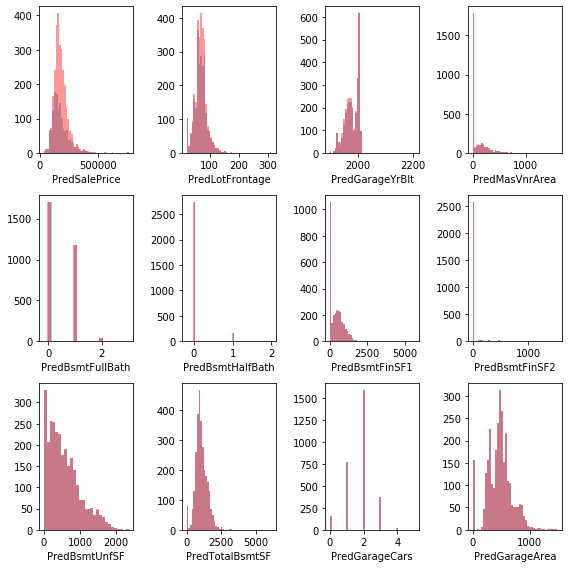

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
k=0
fig,axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(8, 8)
for i in range(0,3):
    for j in range(0,4):
        sns.distplot(Data_of_Num[Misssing_col[k]].dropna(), kde = False, ax = axes[i, j])
        sns.distplot(pred_data[Pred_Handling[k]], kde = False, ax = axes[i,j], color = 'red')
        k = k+1
        plt.tight_layout()
plt.show()
        

In [48]:
##In sale price and lotFrontage have more std than the predicted so we can use some noise in the data 

In [52]:
RandNoiseData = pd.DataFrame(columns = ['Noise' + i for i in Misssing_col])
for feature in Misssing_col:
    RandNoiseData['Noise'+feature]=Data_of_Num[feature + '_imp']
    parameters = list(set(Data_of_Num.columns) - set(Misssing_col) - {feature + '_imp'})
    model = LinearRegression()
    model.fit(X = Data_of_Num[parameters],y = Data_of_Num[feature+'_imp'])
    predict = model.predict(Data_of_Num[parameters])
    std_error = (predict[Data_of_Num[feature].notnull()] - Data_of_Num.loc[Data_of_Num[feature].notnull(), feature + '_imp']).std()
    Random_normal_predict = np.random.normal(size = Data_of_Num[feature].shape[0], loc = predict, scale = std_error)
    RandNoiseData.loc[(Data_of_Num[feature].isnull()) &( Random_normal_predict>0), "Noise" + feature] =Random_normal_predict[(Data_of_Num[feature].isnull()) & 
                                                                            (Random_normal_predict > 0)]      

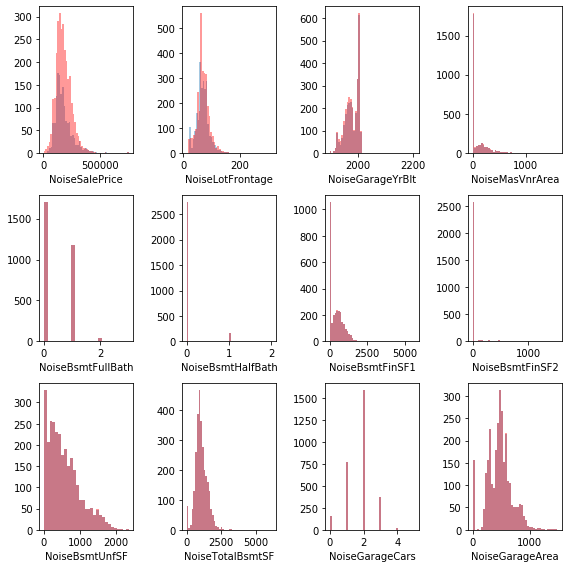

In [56]:
Pred_Handling1 = list(RandNoiseData.columns)
import matplotlib.pyplot as plt
import seaborn as sns
k=0
fig,axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(8, 8)
for i in range(0,3):
    for j in range(0,4):
        sns.distplot(Data_of_Num[Misssing_col[k]].dropna(), kde = False, ax = axes[i, j])
        sns.distplot(RandNoiseData[Pred_Handling1[k]], kde = False, ax = axes[i,j], color = 'red')
        k = k+1
        plt.tight_layout()
plt.show()

In [79]:
RandNoiseData.head()

,NoiseSalePrice,NoiseLotFrontage,NoiseGarageYrBlt,NoiseMasVnrArea,NoiseBsmtFullBath,NoiseBsmtHalfBath,NoiseBsmtFinSF1,NoiseBsmtFinSF2,NoiseBsmtUnfSF,NoiseTotalBsmtSF,NoiseGarageCars,NoiseGarageArea
0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0
1,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0
2,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0
3,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0
4,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0


In [59]:
#Merging Numerical Dataset

In [65]:
Data_of_Num.drop(Misssing_col,axis=1,inplace=True)


SyntaxError: invalid syntax (<ipython-input-65-66cff2699f52>, line 2)

In [72]:
for i in range(len(Misssing_col)):
    Misssing_col[i] = Misssing_col[i]+'_imp'

In [74]:
Data_of_Num.drop(Misssing_col,axis=1,inplace=True)

In [75]:
Data_of_Num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,1145,1053,0,2198,2,1,4,1,9,1,192,84,0,0,0,0,0,12,2008


In [91]:
New_Num_Data = pd.concat((RandNoiseData,Data_of_Num),axis=1)

In [92]:
New_Num_Data.head()

,NoiseSalePrice,NoiseLotFrontage,NoiseGarageYrBlt,NoiseMasVnrArea,NoiseBsmtFullBath,NoiseBsmtHalfBath,NoiseBsmtFinSF1,NoiseBsmtFinSF2,NoiseBsmtUnfSF,NoiseTotalBsmtSF,NoiseGarageCars,NoiseGarageArea,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0,1,60,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,2,2008
1,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0,2,20,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,5,2007
2,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0,3,60,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,9,2008
3,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0,4,70,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,0,35,272,0,0,0,0,2,2006
4,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0,5,60,14260,8,5,2000,2000,1145,1053,0,2198,2,1,4,1,9,1,192,84,0,0,0,0,0,12,2008


In [95]:
Data_of_Cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [127]:
Resultant = pd.concat((New_Num_Data,Data_of_Cat),axis=1)

In [128]:
Resultant.head()

,NoiseSalePrice,NoiseLotFrontage,NoiseGarageYrBlt,NoiseMasVnrArea,NoiseBsmtFullBath,NoiseBsmtHalfBath,NoiseBsmtFinSF1,NoiseBsmtFinSF2,NoiseBsmtUnfSF,NoiseTotalBsmtSF,NoiseGarageCars,NoiseGarageArea,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0,1,60,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0,2,20,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0,3,60,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0,4,70,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0,5,60,14260,8,5,2000,2000,1145,1053,0,2198,2,1,4,1,9,1,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [133]:
X = Resultant.iloc[:,1:]
Y = Resultant.iloc[:,0]
col = list(X.columns)

In [134]:
#standard scalar
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
for i in range(0,X.shape[1]):
    X[col[i]] = sc.fit_transform(X[col[i]].values.reshape(-1,1))

In [135]:
Resultant.head()

,NoiseSalePrice,NoiseLotFrontage,NoiseGarageYrBlt,NoiseMasVnrArea,NoiseBsmtFullBath,NoiseBsmtHalfBath,NoiseBsmtFinSF1,NoiseBsmtFinSF2,NoiseBsmtUnfSF,NoiseTotalBsmtSF,NoiseGarageCars,NoiseGarageArea,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,208500.0,65.0,2003.0,196.0,1.0,0.0,706.0,0.0,150.0,856.0,2.0,548.0,1,60,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,181500.0,80.0,1976.0,0.0,0.0,1.0,978.0,0.0,284.0,1262.0,2.0,460.0,2,20,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,223500.0,68.0,2001.0,162.0,1.0,0.0,486.0,0.0,434.0,920.0,2.0,608.0,3,60,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,140000.0,60.0,1998.0,0.0,1.0,0.0,216.0,0.0,540.0,756.0,3.0,642.0,4,70,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,250000.0,84.0,2000.0,350.0,1.0,0.0,655.0,0.0,490.0,1145.0,3.0,836.0,5,60,14260,8,5,2000,2000,1145,1053,0,2198,2,1,4,1,9,1,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [136]:
X.head()

,NoiseLotFrontage,NoiseGarageYrBlt,NoiseMasVnrArea,NoiseBsmtFullBath,NoiseBsmtHalfBath,NoiseBsmtFinSF1,NoiseBsmtFinSF2,NoiseBsmtUnfSF,NoiseTotalBsmtSF,NoiseGarageCars,NoiseGarageArea,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.204830,1.008687,0.520043,1.086586,-0.249757,0.580843,-0.293694,-0.934897,-0.444232,0.306631,0.348722,-1.731458,0.067331,-0.217879,0.646183,-0.507284,1.046258,0.896833,-0.773861,1.207379,-0.101197,0.413547,0.781366,1.232599,0.169927,-0.207698,0.986849,-0.924311,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646,-0.042157,0.064249,0.746669,0.316671,-0.018512,0.588555,-0.21626,-1.248476,-0.046258,-0.009816,-0.419174,1.031721,-0.482926,-0.116923,0.742788,0.750334,-1.267151,-0.755793,0.376461,0.834618,-0.294203,0.28567,0.624607,-0.449736,0.315909,-0.103206,-0.880324,0.26829,0.300615,-0.415996,0.256806,-0.688235,-0.280525,0.233534,0.18646,0.31503,0.319311,0.204967
1,0.446441,-0.039624,-0.574290,-0.819511,3.822499,1.178045,-0.293694,-0.630147,0.477196,0.306631,-0.059954,-1.730271,-0.873616,-0.072044,-0.063185,2.188279,0.154764,-0.395604,0.261075,-0.785025,-0.101197,-0.471891,0.781366,-0.756321,0.169927,-0.207698,-0.287758,0.623632,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962,-0.042157,0.064249,0.746669,0.316671,-0.018512,-0.658174,-0.21626,1.941064,-1.190557,-0.009816,-0.419174,-0.536817,-0.482926,-0.116923,-0.507795,-0.657990,0.384843,0.668455,0.376461,-0.541017,-0.294203,0.28567,-1.158500,-1.546918,0.315909,-0.103206,-0.880324,0.26829,0.300615,0.782713,0.256806,-0.688235,-0.280525,0.233534,0.18646,0.31503,0.319311,0.204967
2,-0.074576,0.931034,0.330209,1.086586,-0.249757,0.097812,-0.293694,-0.289009,-0.298982,0.306631,0.627365,-1.729084,0.067331,0.137197,0.646183,-0.507284,0.980221,0.848965,-0.610718,1.235375,-0.101197,0.563755,0.781366,1.232599,0.169927,-0.207698,-0.287758,0.623632,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646,-0.042157,0.064249,-1.381776,0.316671,-0.018512,0.588555,-0.21626,-1.248476,-0.046258,-0.009816,-0.419174,1.031721,-0.482926,-0.116923,0.742788,0.750334,-1.267151,-0.755793,0.376461,0.834618,-0.294203,0.28567,-0.266947,-0.449736,0.315909,-0.103206,-0.880324,0.26829,0.300615,-0.415996,0.256806,-0.688235,-0.280525,0.233534,0.18646,0.31503,0.319311,0.204967
3,-0.421920,0.814555,-0.574290,1.086586,-0.249757,-0.494999,-0.293694,-0.047937,-0.671185,1.620042,0.785262,-1.727897,0.302568,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.506205,0.978742,-0.101197,0.427382,-1.027363,-0.756321,0.169927,-0.207698,0.349546,0.623632,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569,-0.042157,0.064249,-1.381776,0.316671,-0.018512,-1.904903,-0.21626,-1.080605,-0.046258,-0.009816,-0.419174,1.031721,-0.482926,-0.116923,1.055433,1.313664,0.384843,0.668455,0.376461,-1.916652,0.835768,-2.68713,0.624607,-1.546918,0.315909,-0.103206,0.267617,0.26829,0.300615,-0.415996,0.256806,1.577932,0.941643,0.233534,0.18646,0.31503,0.319311,-3.505415
4,0.620113,0.892208,1.379875,1.086586,-0.249757,0.468867,-0.293694,-0.161650,0.211661,1.620042,1.686207,-1.726711,0.067331,0.518903,1.355551,-0.507284,0.947203,0.753229,-0.037170,1.671651,-0.101197,1.378042,0.781366,1.232599,1.385655,-0.207698,1.624153,0.623632,0.776967,0.540424,-0.359601,-0.103

In [100]:
%%markdown
# pca

# pca


In [139]:
from sklearn.decomposition import PCA
X_PCA = PCA(n_components=2,random_state=42)
pca=X_PCA.fit_transform(X)
pca_data = pd.DataFrame(data=pca,columns=("Dim_1", "Dim_2"))

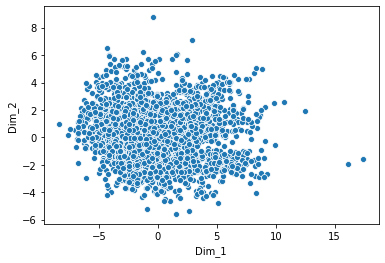

In [140]:
sns.scatterplot("Dim_1","Dim_2",data=pca_data)

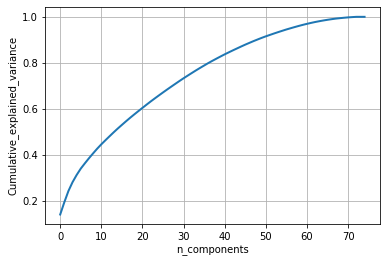

In [142]:
#feature Importance
#from this 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.n_components = X.shape[1]
pca_data = pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [144]:
#we can take  50 feature to retain 90 percent info

(2919, 75)

In [146]:
from sklearn.decomposition import PCA
X_PCA = PCA(n_components=50,random_state=42)
pca=X_PCA.fit_transform(X)
pca_data = pd.DataFrame(data=pca)

In [147]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.233369,0.814190,-1.963563,1.163213,-1.142180,0.756434,-0.404153,-1.377159,1.324297,0.393004,-0.411819,1.314339,-0.842970,0.208686,-0.338179,-1.013204,0.329030,-0.616764,0.124961,0.072622,0.116460,-0.005986,-0.538383,0.034370,-0.105631,0.554649,0.596392,0.049982,0.528852,-0.922469,0.648088,0.819290,-1.058379,-0.662430,0.191564,-0.421627,-0.494478,-0.385829,-0.021709,0.459453,0.724216,-0.553796,-0.724354,-0.155242,0.174281,-0.499153,0.548165,0.201216,0.339499,-0.286356
1,0.272357,-2.123311,0.965213,0.599607,-0.859671,-0.688998,-1.385702,0.172200,-0.204433,-0.272031,-1.084952,-0.650558,0.517733,-0.828855,2.558263,0.742084,-0.685461,0.699937,1.394003,-0.384598,-0.860868,1.482650,-1.860392,-0.486206,-0.045901,-1.963477,-0.351238,-0.145918,0.741647,0.512653,0.004348,-0.665851,0.027179,0.936546,-0.365366,-0.636448,-0.175267,1.055304,-0.398404,1.037553,0.477412,-1.570083,-0.721470,-0.241557,0.774068,-0.809247,-1.176001,-0.198749,0.467344,-1.026692
2,2.685058,0.523818,-1.557089,1.032080,-1.327832,0.727006,0.087997,-1.383509,0.311799,0.143475,0.186812,0.864676,-0.650974,0.054313,-0.010850,-0.491330,0.361179,0.289575,0.698451,-0.467054,-0.349198,-0.717045,0.084364,0.028720,0.043338,0.723036,-1.049401,0.362091,0.454322,-0.084424,0.790781,-0.310653,-0.514766,-0.512638,0.682233,0.206088,-0.308289,-0.997702,-0.076685,-0.026101,0.729906,0.130437,-0.342779,-0.225864,-0.511112,0.742417,0.351236,0.449600,0.109760,-0.280053
3,-1.333136,1.203225,1.293367,0.889523,-1.019118,1.568579,-0.675641,-0.542267,1.016871,0.559431,0.417821,-0.990767,0.060580,3.279629,1.872354,-0.019768,-0.049436,-0.562434,-0.367760,1.365808,-1.236438,-1.864257,1.768656,1.018638,-0.871293,-0.212068,-0.767415,-1.148469,2.311704,0.742369,-0.501635,0.195712,-1.093385,-1.077368,0.894271,1.425159,-0.897926,2.537960,-0.237899,0.105208,1.475898,1.276252,-1.732452,-1.181043,0.138690,0.179842,0.760009,0.243184,0.885040,-0.061163
4,5.014081,1.481566,0.201580,1.749761,-0.955695,0.544842,-0.136163,-1.213141,0.604259,0.521322,0.526435,0.002647,-0.975257,0.142896,0.719417,0.793113,0.457119,0.654354,0.857061,-0.636392,-0.872124,-1.083410,-0.191044,0.265547,-0.284926,0.377226,-1.399129,0.682044,0.098365,0.585461,1.088191,-0.299930,0.101900,-0.323456,-0.355023,0.726700,-0.245824,-0.615017,-0.005743,0.161402,0.422242,0.040276,0.020294,0.441172,-0.422456,-0.129507,-0.379005,0.261411,-0.039899,-0.066973


In [148]:
X = pca_data